In [1]:
import pyarrow as pa
import os
import sys
import pandas as pd
import numpy as np
from pathlib import Path
import polars as pl
from typing import Union

notebook_dir = os.path.dirname(os.path.abspath("__file__"))
sys.path.append(notebook_dir)
from src.inference.aws_inference import process_jsonl_files


jsonl_dir = "/data1/datasets_1/human_cistrome/chip-atlas/peak_calls/tfbinding_scripts/tf-binding/data/jsonl_output/AR-log10-22Rv1"
project_path = "/data1/datasets_1/human_cistrome/chip-atlas/peak_calls/tfbinding_scripts/tf-binding"
model = "AR-log10"
sample = "22Rv1"


sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /data1/home/wjarrard/.config/sagemaker/config.yaml


In [2]:
df = pl.read_parquet(project_path + "/data/processed_results/" + model + "_" + sample + "_processed.parquet")
df

chr_name,start,end,cell_line,targets,predicted,weights,probabilities,linear_512_output,motifs,attributions
str,i64,i64,str,f64,f64,f64,f64,list[list[f64]],str,list[list[f64]]
"""chr7""",98400495,98401787,"""22Rv1""",0.0,1.0,0.0,0.67796,"[[0.484829, 0.080441, … -0.94665]]","""AAGCACAGGGAGGAG""","[[0.0, 0.0, … -0.004543], [0.0, 0.0, … -0.00025], … [0.0, 0.0, … 0.001494]]"
"""chr7""",98420778,98421717,"""22Rv1""",0.0,0.0,0.0,0.023767,"[[-4.189102, -5.197359, … -6.428845]]","""AGAATAAGACTGGAC""","[[0.0, 0.0, … 0.000716], [0.0, -0.098338, … -0.017634], … [0.0, 0.0, … -0.013235]]"
"""chr7""",98432939,98434214,"""22Rv1""",0.0,0.0,0.0,0.000275,"[[-3.365082, -3.620694, … -6.13032]]","""AAGGACAGAGCCTCT""","[[0.0, 0.0, … -0.006634], [0.0, 0.0, … -0.006881], … [0.0, 0.0, … -0.02067]]"
"""chr7""",98458219,98459680,"""22Rv1""",0.0,0.0,0.0,0.000014,"[[-5.88799, -7.971177, … -4.527099]]","""GGGCCCAGCAGAAGC""","[[0.0, 0.0, … 0.006021], [-0.094158, 0.0, … -0.003868], … [0.0, 0.0, … -0.01099]]"
"""chr7""",98470281,98471244,"""22Rv1""",0.0,0.0,0.0,0.183804,"[[-2.164398, -4.028178, … -2.336005]]","""CCAGAGTATTAGGAA""","[[0.0, 0.0, … -0.010573], [0.0, -0.016874, … 0.000507], … [0.0, 0.0, … -0.002064]]"
…,…,…,…,…,…,…,…,…,…,…
"""chr19""",47012427,47013629,"""22Rv1""",0.0,0.0,0.0,0.000036,"[[-4.292775, -6.805507, … -5.037985]]","""TTTCTCACCCGGCTC""","[[0.0, 0.0, … -0.012433], [0.04277, -0.094584, … -0.019523], … [0.0, 0.0, … -0.002403]]"
"""chr19""",47018987,47021676,"""22Rv1""",0.0,0.0,0.0,0.000783,"[[-3.021228, -6.160167, … -3.689361]]","""TGAATTGGACCCGGG""","[[0.0, 0.0, … -0.023473], [-0.069831, 0.0, … -0.004291], … [0.0, 0.0, … 0.016371]]"
"""chr19""",47032119,47032570,"""22Rv1""",0.0,0.0,0.0,0.000199,"[[-4.482697, -5.897265, … -5.01086]]","""GAGAACAGCAGCCTC""","[[0.0, 0.0, … -0.001367], [0.0, 0.0, … -0.00663], … [0.0, 0.0, … 0.005722]]"


In [3]:
# take all the targets that are 1, and an equal number of targets that are 0
df_positive = df.filter(pl.col("targets") == 1)
df_negative = df.filter(pl.col("targets") == 0).sample(n=len(df_positive), seed=42)
df_balanced = pl.concat([df_positive, df_negative])
df_balanced

chr_name,start,end,cell_line,targets,predicted,weights,probabilities,linear_512_output,motifs,attributions
str,i64,i64,str,f64,f64,f64,f64,list[list[f64]],str,list[list[f64]]
"""chr1""",9978,10518,"""22Rv1""",1.0,1.0,6.0,0.996213,"[[5.03963, 5.322989, … 0.688815]]","""TTAGGGTTAGGGTTA""","[[0.033958, 0.0, … -0.056828], [0.030253, 0.0, … -0.076504], … [0.0, 0.0, … -0.002398]]"
"""chr1""",790860,790979,"""22Rv1""",1.0,1.0,2.0,0.998741,"[[1.51734, 0.63158, … 1.993532]]","""TATAACAGAATGGAA""","[[0.0, 0.0, … -0.020666], [0.0, 0.0, … -0.009708], … [0.0, 0.0, … 0.002047]]"
"""chr1""",815530,815860,"""22Rv1""",1.0,1.0,4.0,0.990827,"[[1.321818, 0.358925, … 2.139156]]","""TAGAACAAGGTGGTT""","[[0.0, 0.0, … 0.002516], [0.0, 0.0, … -0.00312], … [0.0, 0.0, … -0.006948]]"
"""chr1""",2653766,2654160,"""22Rv1""",1.0,0.0,3.0,0.000041,"[[-2.83153, -3.029927, … -4.535841]]","""CAGCACCCACAGCCC""","[[0.0, 0.0, … 0.011964], [0.0, -0.044457, … -0.030918], … [0.0, 0.0, … -0.016236]]"
"""chr1""",6157923,6158193,"""22Rv1""",1.0,1.0,2.0,0.998819,"[[1.364641, 1.285244, … 1.032656]]","""CCCTTTGTTCTTTTA""","[[0.0, 0.0, … -0.021104], [0.0, 0.0, … 0.000186], … [0.0, 0.0, … -0.001123]]"
…,…,…,…,…,…,…,…,…,…,…
"""chr17""",27044898,27045603,"""22Rv1""",0.0,0.0,0.0,0.000029,"[[-4.629505, -7.153571, … -6.885093]]","""GGGAACTCCCTGACC""","[[0.0, 0.0, … -0.00151], [0.0, -0.021422, … -0.004437], … [0.0, 0.0, … -0.004126]]"
"""chr19""",46923814,46926155,"""22Rv1""",0.0,1.0,0.0,0.679474,"[[0.646233, -1.24109, … -1.155089]]","""CAGCTGTTTTCTGCT""","[[0.0, 0.0, … 0.006251], [0.000074, 0.02292, … 0.000028], … [0.0, 0.0, … 0.006353]]"
"""chr17""",50851852,50853166,"""22Rv1""",0.0,0.0,0.0,0.000097,"[[-2.493012, -2.660197, … -4.187425]]","""GAGAGGAAAACCTTG""","[[0.0, 0.0, … -0.018742], [0.0, 0.0, … -0.00691], … [0.0, 0.0, … 0.003114]]"


In [4]:
def reshape_attributions(df):
    # Convert to numpy array first
    attributions = df['attributions'].values
    
    # Create empty array with correct shape
    n_samples = len(df)  # 46218
    reshaped = np.empty((n_samples, 4096, 5))
    
    # Fill the array by properly accessing each (5,) array
    for i, row in enumerate(attributions):
        for j, element in enumerate(row):
            reshaped[i, j] = element

    # Split into ACGT and ATAC components
    attrs_list = reshaped[..., :4].transpose(0, 2, 1)  # Shape: (n_samples, 4, 4096)
    atac_list = reshaped[..., 4]  # Shape: (n_samples, 4096)
            
    return attrs_list, atac_list

# Usage:
attrs_list, atac_list = reshape_attributions(df_positive.to_pandas())
print(f"Attrs shape: {attrs_list.shape}")  # Should be (46218, 4096, 5)
print(f"ATAC shape: {atac_list.shape}")  # Should be (46218, 4096)

Attrs shape: (5334, 4, 4096)
ATAC shape: (5334, 4096)


In [5]:
# Import additional required libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn
seaborn.set_style('whitegrid')
from tangermeme.plot import plot_logo
from tangermeme.seqlet import recursive_seqlets

# Get seqlets
def get_seqlets(attrs_list):
    attrs_array = np.stack(attrs_list, axis=0)
    seqlets = recursive_seqlets(attrs_array.sum(axis=1))
    
    nt_idx = {0: 'A', 1: 'C', 2: 'G', 3: 'T'}
    
    # Add sequences to seqlets df
    sequences = []
    for i in range(len(seqlets)):
        sample = seqlets.iloc[i]
        start = int(sample['start'])
        end = int(sample['end'])
        sample_idx = int(sample['example_idx'])
        
        sample_attrs = attrs_array[sample_idx, :, start:end].T.squeeze()
        hits = np.argmax(sample_attrs, axis=1)
        seq = ''.join([nt_idx[i] for i in hits])
        sequences.append(seq)
    seqlets['sequence'] = sequences
    
    return seqlets

# Plot function (simplified version)
def plot_seqlet(seqlets, attrs_list, sample_rank=0, context_size=20):
    sample = seqlets.iloc[[sample_rank]]
    slice = int(sample['example_idx'].tolist()[0])
    sequence = sample['sequence'].tolist()[0]
    start = int(sample['start'].tolist()[0])
    end = int(sample['end'].tolist()[0])
    
    seqlen = end - start
    window_size = seqlen + (context_size * 2)
    
    X_attr = attrs_list[slice]
    X_attr = X_attr.astype(np.float64)
    
    TSS_pos = int(np.mean([start, end]))
    window = (TSS_pos - (window_size // 2), TSS_pos + (window_size // 2))
    
    plt.figure(figsize=(16, 9), dpi=300)
    ax = plt.subplot(111)
    plot_logo(
        X_attr,
        ax=ax,
        start=window[0],
        end=window[1]
    )
    
    plt.xlabel("Genomic Coordinate")
    plt.ylabel("Attributions")
    plt.title(f"DeepLIFT Attributions for sample: {slice} | {sequence}")
    plt.show()

2025-01-13 11:53:37 - WARNING - Matplotlib is building the font cache; this may take a moment.


In [6]:
seqlets = get_seqlets(attrs_list)
seqlets

,example_idx,start,end,attribution,p-value,sequence
0,4880,1967,1985,-81.665554,7.048029e-07,AGGCCACAGAACGAATAC
1,962,2054,2063,34.371360,1.147970e-06,GTTCAAATT
2,3796,1961,1985,-79.031895,1.245291e-06,ACAAGCGCAAAGACATAAAAATGT
3,4880,2056,2067,34.373798,2.199365e-06,AACACTGAATA
4,626,1877,1890,-41.031733,4.508602e-06,AAGCCACAGCAAC
...,...,...,...,...,...,...
31269,1636,2046,2051,-1.917607,9.934100e-03,AGGCT
31270,5138,2044,2049,-2.433702,9.934100e-03,AAACT
31271,3474,1607,1612,-2.172005,9.934100e-03,AGCGA
31272,2659,2090,2095,-2.057149,9.934100e-03,AAGAA


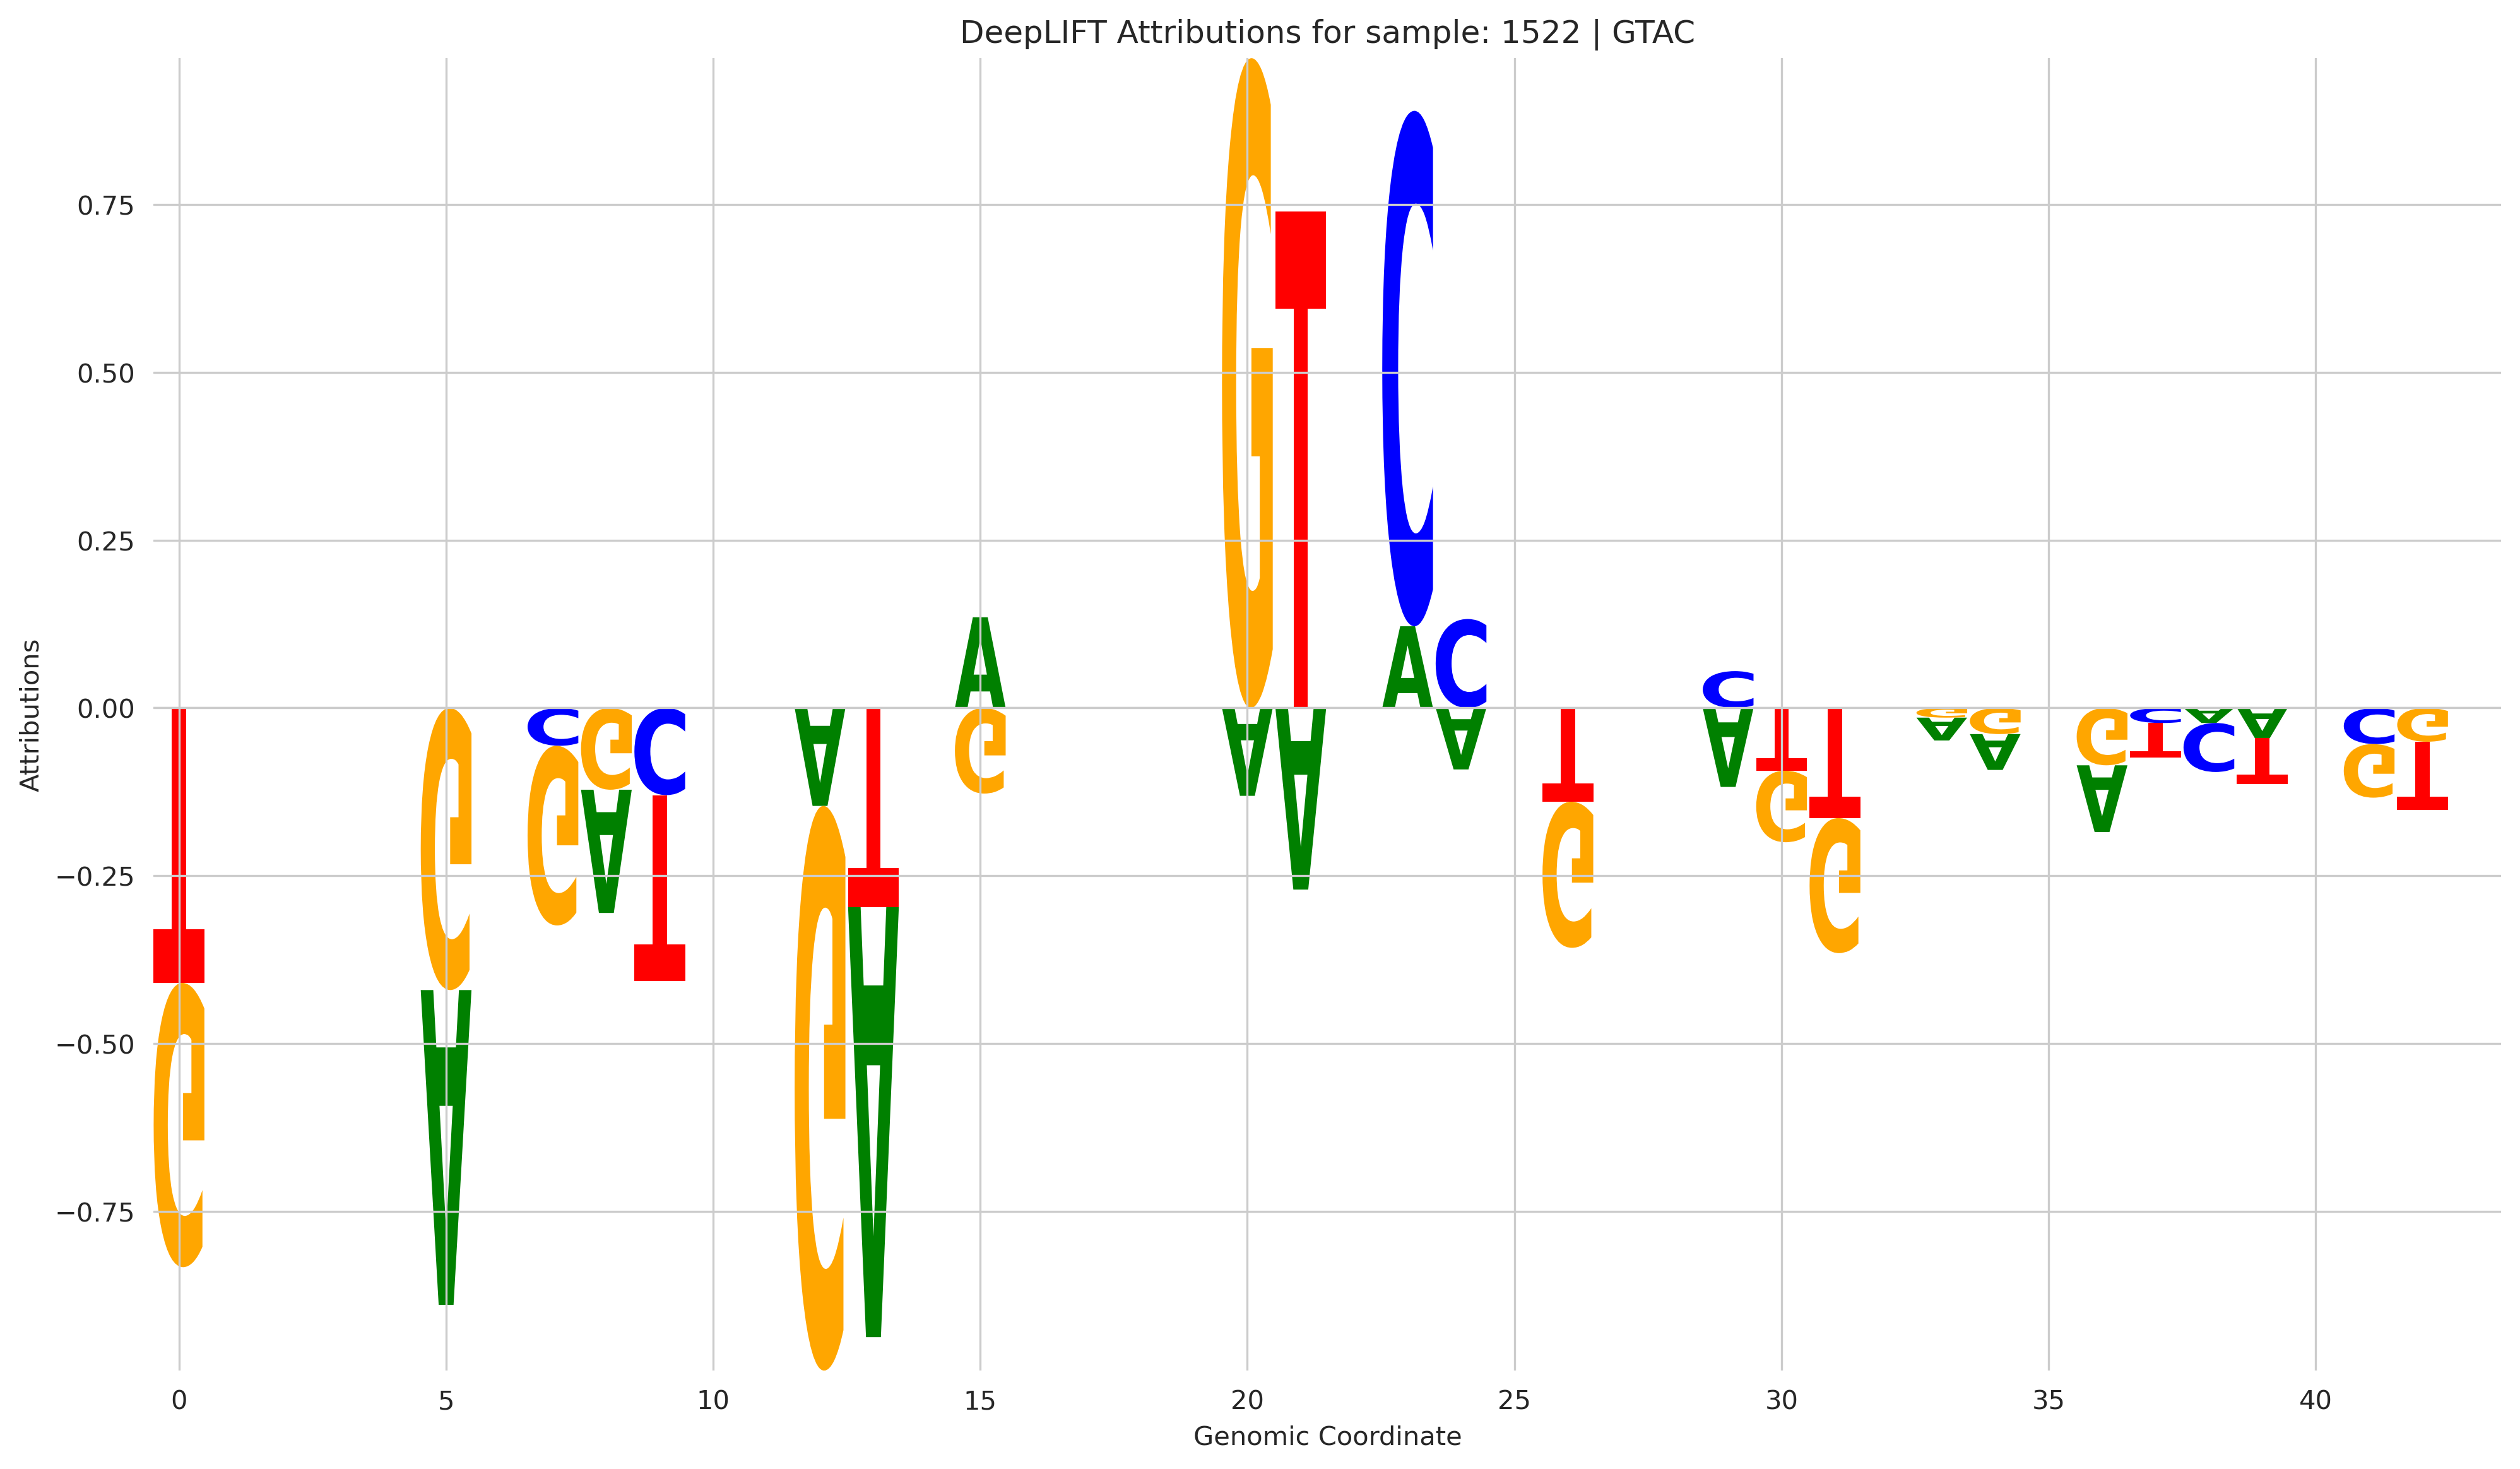

In [7]:
plot_seqlet(seqlets, attrs_list, sample_rank=6127, context_size=20)

In [8]:
from dataclasses import dataclass, field
from typing import List, Tuple

@dataclass
class PWM:
    """Container for position weight matrix data."""
    name: str
    matrix: np.ndarray
    bases: List[str] = field(default_factory=lambda: ['A', 'C', 'G', 'T'])
    
    def get_consensus(self, prob_threshold: float = 0.25) -> str:
        """Get consensus sequence from PWM using IUPAC ambiguity codes."""
        iupac_map = {
            'A': 'A', 'C': 'C', 'G': 'G', 'T': 'T',
            'AC': 'M', 'AG': 'R', 'AT': 'W',
            'CG': 'S', 'CT': 'Y', 'GT': 'K',
            'ACG': 'V', 'ACT': 'H', 'AGT': 'D', 'CGT': 'B',
            'ACGT': 'N'
        }
        
        consensus = []
        for pos_probs in self.matrix.T:
            significant_bases = ''.join(b for b, p in zip(self.bases, pos_probs) 
                                     if p >= prob_threshold)
            significant_bases = ''.join(sorted(significant_bases))
            consensus.append(iupac_map.get(significant_bases, 'N'))
        return ''.join(consensus)

def parse_jaspar(jaspar_file: str) -> PWM:
    """Parse a JASPAR format PWM file."""
    with open(jaspar_file) as f:
        lines = f.readlines()
    
    if not lines or len(lines) != 5:
        raise ValueError("Invalid JASPAR format")
        
    name = lines[0].split()[0]
    matrix = []
    
    for line in lines[1:]:
        nums = line.split('[')[1].split(']')[0].strip().split()
        matrix.append([float(x) for x in nums])
    
    matrix = np.array(matrix)
    matrix = matrix / matrix.sum(axis=0)
    
    return PWM(name=name, matrix=matrix)

jaspar_file = "/data1/datasets_1/human_cistrome/chip-atlas/peak_calls/tfbinding_scripts/tf-binding/src/inference/motif_finding/motif.jaspar"  # Update this path
pwm = parse_jaspar(jaspar_file)
print(f"Loaded PWM: {pwm.name}")
print(f"Consensus sequence: {pwm.get_consensus()}")


Loaded PWM: >MA0007.2
Consensus sequence: RRGAACASAVWGTTC


In [9]:

def iupac_match(a: str, b: str) -> bool:
    """Check if two IUPAC nucleotide codes match."""
    iupac = {
        'A': {'A'},
        'C': {'C'},
        'G': {'G'},
        'T': {'T'},
        'R': {'A', 'G'},
        'Y': {'C', 'T'},
        'S': {'G', 'C'},
        'W': {'A', 'T'},
        'K': {'G', 'T'},
        'M': {'A', 'C'},
        'B': {'C', 'G', 'T'},
        'D': {'A', 'G', 'T'},
        'H': {'A', 'C', 'T'},
        'V': {'A', 'C', 'G'},
        'N': {'A', 'C', 'G', 'T'}
    }
    
    a = a.upper()
    b = b.upper()
    
    if a not in iupac or b not in iupac:
        raise ValueError(f"Invalid IUPAC code: {a if a not in iupac else b}")
        
    return bool(iupac[a] & iupac[b])


def levenshtein_iupac(seq1: str, seq2: str) -> int:
    """Calculate Levenshtein distance between two DNA sequences with IUPAC codes."""
    if not seq1: return len(seq2)
    if not seq2: return len(seq1)
    
    # Initialize lists instead of range objects
    previous_row = list(range(len(seq2) + 1))
    current_row = [0] * (len(seq2) + 1)
    
    for i, c1 in enumerate(seq1):
        current_row[0] = i + 1
        
        for j, c2 in enumerate(seq2):
            insertions = previous_row[j + 1] + 1
            deletions = current_row[j] + 1
            substitutions = previous_row[j] + (not iupac_match(c1, c2))
            
            current_row[j + 1] = min(insertions, deletions, substitutions)
            
        previous_row, current_row = current_row, [0] * (len(seq2) + 1)  # Reset current_row
        
    return previous_row[-1]


def score_seqlet(pwm: PWM, seq: str) -> Tuple[float, int]:
    """Score a sequence against a PWM using IUPAC-aware Levenshtein distance."""
    from Bio import motifs
    from Bio.Seq import Seq
    
    seq_len = len(seq)
    pwm_width = pwm.matrix.shape[1]
    consensus = pwm.get_consensus()
    
    if seq_len < pwm_width:
        max_score = float('-inf')
        best_pos = 0
        for i in range(pwm_width - seq_len + 1):
            cons_slice = consensus[i:i+seq_len]
            raw_dist = levenshtein_iupac(seq, cons_slice)
            norm_score = 1 - (raw_dist / max(len(seq), len(cons_slice)))
            if norm_score > max_score:
                max_score = norm_score
                best_pos = i
        return max_score, best_pos
    
    elif seq_len == pwm_width:
        raw_dist = levenshtein_iupac(seq, consensus)
        norm_score = 1 - (raw_dist / len(consensus))
        return norm_score, 0
    
    else:
        max_score = float('-inf')
        best_pos = 0
        for i in range(seq_len - pwm_width + 1):
            subseq = seq[i:i+pwm_width]
            raw_dist = levenshtein_iupac(subseq, consensus)
            norm_score = 1 - (raw_dist / len(consensus))
            if norm_score > max_score:
                max_score = norm_score
                best_pos = i
        return max_score, best_pos

In [10]:

from tqdm.notebook import tqdm

scores = []
positions = []
for _, row in tqdm(seqlets.iterrows(), total=len(seqlets)):
    score, pos = score_seqlet(pwm, row['sequence'])
    scores.append(score)
    positions.append(pos)

# Add scores to dataframe
seqlets['pwm_score'] = scores
seqlets['pwm_position'] = positions

# Sort by score and display top matches
top_matches = seqlets.sort_values('pwm_score', ascending=False).head(10)
print("\nTop 10 PWM matches:")
print(top_matches[['sequence', 'pwm_score', 'pwm_position']])

  0%|          | 0/31274 [00:00<?, ?it/s]


Top 10 PWM matches:
      sequence  pwm_score  pwm_position
21        AAAG        1.0             8
31245    CAGAG        1.0             5
31272    AAGAA        1.0             0
31244     AAGA        1.0             0
31241    ACACA        1.0             4
21092     CAAA        1.0             7
21110     CAAA        1.0             7
21104     CAAA        1.0             7
21118     AGAC        1.0             6
21119     AAGA        1.0             0


In [12]:

def write_fasta(sequences, outfile):
    """Write sequences to FASTA format with auto-generated headers."""
    with open(outfile, 'w') as f:
        for i, seq in enumerate(sequences):
            f.write(f'>seq_{i+1}\n{seq}\n')


def save_seqlets(seqlets, output_dir):
    pos_seqlets = seqlets[seqlets['attribution'] > 0].reset_index(drop=True)
    neg_seqlets = seqlets[seqlets['attribution'] < 0].reset_index(drop=True)

    pos_seqlets.to_csv(os.path.join(output_dir, "positive_seqlets.csv"), 
                       index=False)
    neg_seqlets.to_csv(os.path.join(output_dir, "negative_seqlets.csv"), 
                       index=False)
    
    candidate_motifs = pos_seqlets['sequence'].tolist()
    write_fasta(
        candidate_motifs, 
        outfile=os.path.join(output_dir, "positive_seqlets.fa")
    )



save_seqlets(seqlets, "./")

